Krishan Kumar Pandey

# Data Analysis:Communicate Data Findings

## Table of Contents

1.Introduction


2.Data wrangling process
     
     a.Data gathering
     
     b.Data Assessing
          
          i.Quality Issues
          
          ii.Tidiness Issues
     
     c.Data Cleaning
           i.Define
           
           ii.Code
           
           iii.Test

3. Exploratory Data Analysis

    I. Univariate Visualization
    
    II. Bivariate Visualization
    
    III. Multivariate Visualization
    
    
4. Conclusion

## 1. Introduction

In this project I will be doing data analysis of Bay Wheels's trip dataset of the year 2017. Bay Wheel's Dataset cover the three major regions San Francisco,San Jose and East Bay where the trips begin and end as well(It can be intra or inter region trips).

The data consist of bike rides from FY2017. The attributes include the trip start/end time, start/end station, duration in seconds as well as additional information such as user type. 

The main purpose of doing analysis is to find out the trends and some useful information.
On the basis of those trends we can get business insights visually.

To do data analysis I will follow the ideal way of data preprocessing, data visualization and the documentation. Atlast I would end with a proper story telling in a new notebook with suitable visualizations like Univariate, Bivarite and Multivariate.


## 2.Data Wrangling Process

### Data Gathering

The data is downloaded from the given link:https://www.fordgobike.com/system-data 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import os

In [2]:
#read csv
df_trip=pd.read_csv("2017-fordgobike-tripdata.csv")

### Data Assessing

#### Visual Assessment

In [3]:
#assess data
df_trip

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber


#### Programmatic Assessment

In [4]:
#another way of Assessment
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
#check for missing values
df_trip.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

#### Visually Check for missing values in the dataset

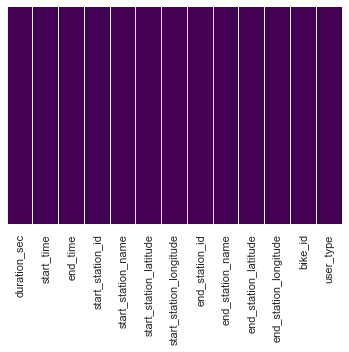

In [6]:
#heatmap
sns.heatmap(df_trip.isna(), yticklabels=False,cbar=False,cmap='viridis')

As we can see that there is no missing values in the dataset by graphically as well as statistically

In [7]:
#check for duplicates
sum(df_trip.duplicated())

0

#### Quality Issues:

1.Data type of start_time,end_time is object type.

#### Tidiness Issues

1. start_time and end_time having date in same column it must be separated in two different columns for date.

### Data Cleaning

In [8]:
#make a copy od dataset before cleaning
df_trip_clean = df_trip.copy()

#### Define

Data type of start_time,end_time is object type it must be datetime.

#### Code

In [9]:
#using for loop to deeal with two columns at a time while correcting data type
for col in ["start_time", "end_time"]:
    df_trip_clean[col] = pd.to_datetime(df_trip_clean[col])

#### Test

In [10]:
#test
df_trip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

#### make day,month in individual columns 

In [11]:
#fucntion for indivisaul day
#for start_time
def day(name,name2):
    df_trip_clean[name] = name2.dt.day
    
day('start_day',df_trip_clean.start_time)


In [12]:
#for end_time
day('end_day',df_trip_clean.end_time)


In [13]:
#fucntion for indivisaul month
def month(name,name2):
    df_trip_clean[name] = name2.dt.month
    
month('start_month',df_trip_clean.start_time)

In [14]:
#for end_time
month('end_month',df_trip_clean.end_time)

In [15]:
#Test the changes you made in your dataset
df_trip_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_day,end_day,start_month,end_month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,31,1,12,1
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,31,1,12,1
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,31,1,12,1
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,31,1,12,1
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,31,1,12,1


#### Make a new column containing the start station names on the bais of longitude

In [16]:
#the start station names are given very raw manner
#separate start regions on the basis of longitude to make analysis easy 
arr = df_trip_clean["start_station_longitude"].tolist()
#list of stations names
start_station=[]
for long in arr:
    if long > (-122.5) and long  < (-122.33):
        start_station.append('San Francisco')
    elif long  >= (-122.33) and long < (-122.1):
        start_station.append('East Bay')
    elif long  >= (-122.1) and long  < (-121.8):
        start_station.append('San Jose')

    else:
        start_station.append('Unknown')

In [17]:
#to dataframe
df_name = pd.DataFrame({'col':start_station})
df_name.head()

,col
0,San Francisco
1,San Francisco
2,East Bay
3,San Francisco
4,East Bay


In [18]:
#add to station mae column to main dataset
df_trip_clean['start_name']=df_name['col']
df_trip_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_day,end_day,start_month,end_month,start_name
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,31,1,12,1,San Francisco
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,31,1,12,1,San Francisco
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,31,1,12,1,East Bay
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,31,1,12,1,San Francisco
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,31,1,12,1,East Bay


#### Drop Unused Columns From Dataset

In [19]:
#remove few  columns
#as I am keeping my analysis out of end Station so keep only start station names(newly created col only)
df_trip_clean.drop(['start_station_name','end_station_name','start_station_id','end_station_id'],axis=1,inplace=True)


In [20]:
df_trip_clean.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,start_day,end_day,start_month,end_month,start_name
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,37.776435,-122.426244,37.778768,-122.415929,96,Customer,31,1,12,1,San Francisco
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,37.784872,-122.400876,37.766210,-122.426614,88,Customer,31,1,12,1,San Francisco
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,37.870348,-122.267764,37.870348,-122.267764,1094,Customer,31,1,12,1,East Bay
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,37.774520,-122.409449,37.783899,-122.408445,2831,Customer,31,1,12,1,San Francisco
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,37.868813,-122.258764,37.867789,-122.265896,3167,Subscriber,31,1,12,1,East Bay


In [21]:
#Save File as csv
df_trip_clean.to_csv("df_trip_clean.csv",index=False)

## 3. Exploratory Data Analysis(EDA)

### Univariate visualization

so we are in the EDA phase and in this section we will be exploring the single variable using plots and insights will be given 

#### Feature Name: Statrt station

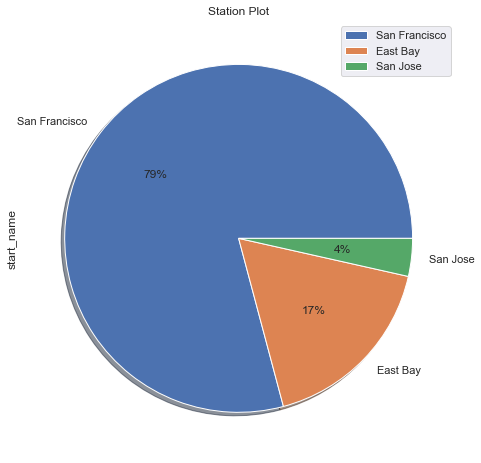

In [22]:
#pie chart for categorical data
df_trip_clean['start_name'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.0f%%', shadow=True,legend=True,title='Station Plot')

###### Analysis: 

Well, this pie chart gives a rough idea about the percentage for the initial bookings in each region.
            And, we can clearly see that San Francisco has most bookings followed by East Baya and then San Jose.

#### Feature Name: User type

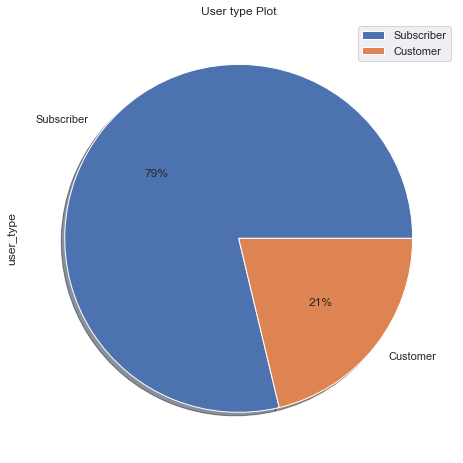

In [23]:
#pie chart for categorical data
df_trip_clean['user_type'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.0f%%',shadow=True, legend=True,title='User type Plot')

###### Analysis:

Pie chart gives better intuition while plotting less categorical features. Here we can visualize that around 4/5 of total bike bookings
are done by subscribers and only 1/5th is done by casual customers.
But, in further analysis we will see the relationships between more features.

####  Feature name: Duration

Text(0.5, 1.0, 'Time Distribution  of Trip')

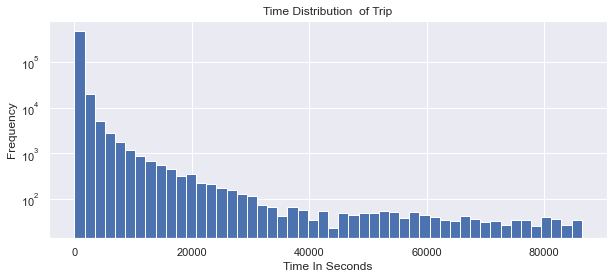

In [24]:
#histogram for continuous or numerical data
plt.figure(figsize=(10,4))
df_trip_clean['duration_sec'].plot(kind='hist',bins=50)
plt.yscale('log')
plt.xlabel('Time In Seconds')
plt.title('Time Distribution  of Trip')

###### Analysis:

After Visualizing trip duration I came to know that trips are done for less than a minute and for a day as well.
so less than minute sort of trips done by children, or free trails provided by the company.

#### Feature Name: Start Day

In [25]:
start_day_count=df_trip_clean.groupby('start_day')['bike_id'].count()

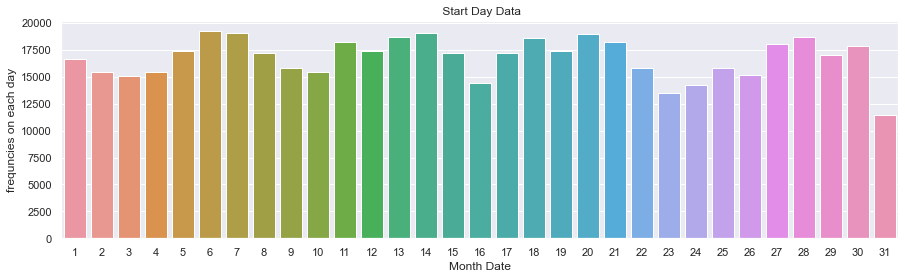

In [26]:
#bar plot for discete value of numeric.
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
plt.figure(figsize=(15,4))
sns.barplot(x=x,y=start_day_count)
#plt.yscale('log')
plt.xlabel('Month Date')
plt.ylabel('frequncies on each day')
plt.title(" Start Day Data")
plt.show()

###### Analysis:

This the clearly visible that there is periodically drop in trips around every 8th day of the month.

#### Feature Name : Start Month

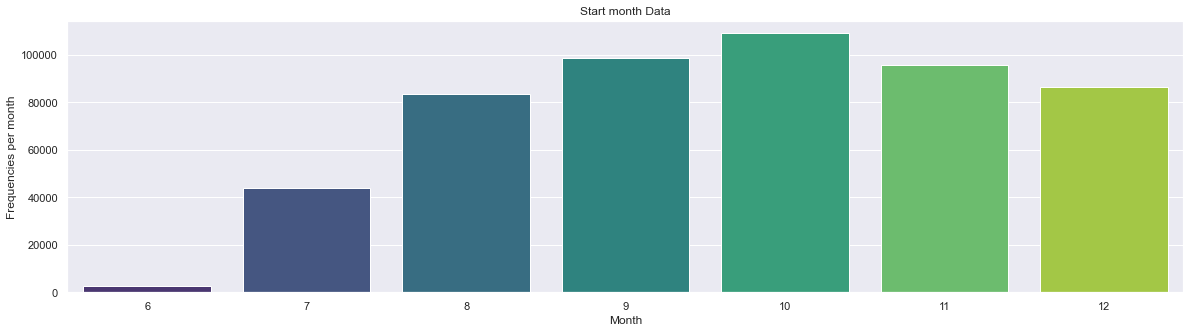

In [27]:
#count plot for numerical sort of data.
fig, ax = plt.subplots(figsize = (20,5))
sns.countplot(x = df_trip_clean["start_month"],  palette = "viridis")
plt.xlabel('Month')
plt.ylabel('Frequencies per month')
plt.title("Start month Data")
plt.show()

###### Analysis:

The trend shows that the bookings are done only from June to December month.October has highest number of bookings.

#### Feature Name: End Month

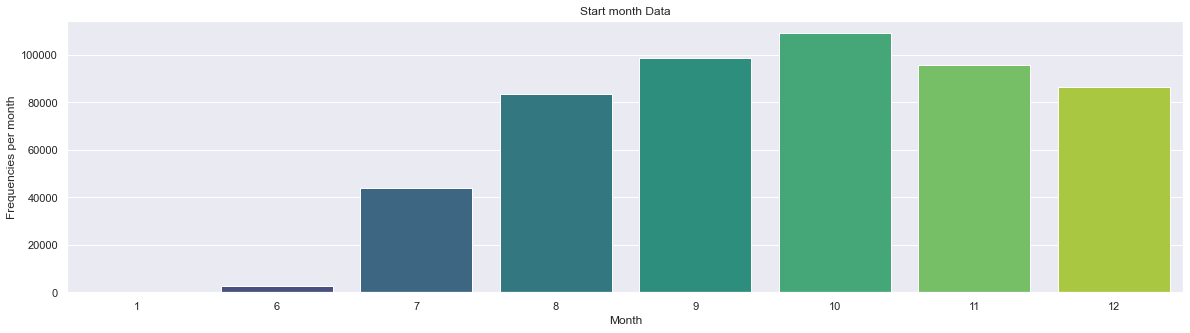

In [28]:
#count plot for numeric sort of data.
fig, ax = plt.subplots(figsize = (20,5))
sns.countplot(x = df_trip_clean["end_month"],  palette = "viridis")
plt.xlabel('Month')
plt.ylabel('Frequencies per month')
plt.title("Start month Data")
plt.show()

###### Analysis:

So, This is related to start month bookings are done only June to December. But what we see that end booking in January it is because 
of the bookings at end of the December month.

#### Feature Name: End station Latitude

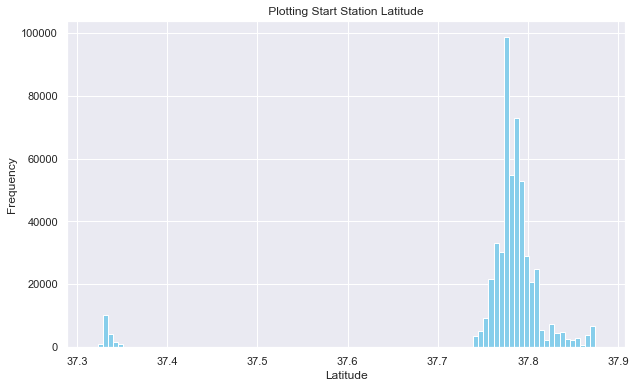

In [29]:
#histogram for continuous data
plt.figure(figsize=(10,6))
df_trip_clean['start_station_latitude'].plot(kind='hist',bins=100,color='skyblue')
plt.title(' Plotting Start Station Latitude ')
plt.xlabel("Latitude")
plt.show()

###### Analysis:

Analysing Latitude alone would not give the idea about starting stations of trips. So i would be doing bivariate as well as multi variate to see
the visualization to differentiate bwtween the stations.

#### Feature Name: Start Station longitude

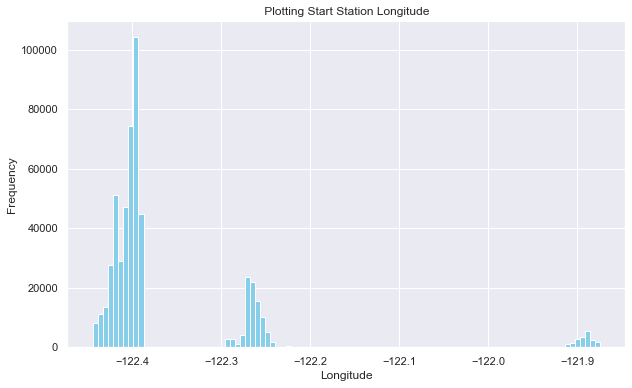

In [30]:
#histogram for continuous data
plt.figure(figsize=(10,6))
df_trip_clean['start_station_longitude'].plot(kind='hist',bins=100,color='skyblue')
plt.title(' Plotting Start Station Longitude ')
plt.xlabel("Longitude")
plt.show()

###### Analysis:

Wow! Great visualization of longitude with respect to the start stations. The locations are differentiable now and we can recognize 
then clearly. But we can't identify the names still. 
While doing Bivariate or multivariate, names will be clear and certain.

#### Feature Name: Start Time

In [31]:
start_hours=df_trip_clean.start_time.dt.hour

Text(0.5, 0, 'Start Time')

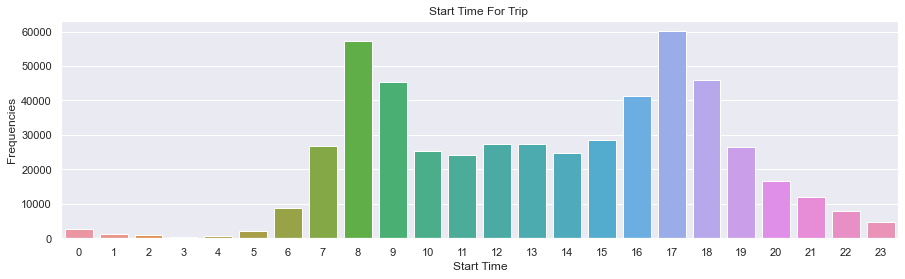

In [32]:
#count plot for dicrete data
plt.figure(figsize=(15,4))
ax=sns.countplot(start_hours)
ax.set_title('Start Time For Trip ')
ax.set_ylabel('Frequencies')
ax.set_xlabel('Start Time')

##### Analysis:

This is very important feature to analyse with respecct to business.
We can see the traffic time when people start their trips.
In the morning 8 am to 9 am and in the evening 4 pm to 6 pm the traffic is high.
we could add more offers and facilities at this time to attract the casual customers and subscribers.

### Bivariate visualization

### Quantitative Variables Vs Quantitative Variables

#### Feature Names:Start Longitude and Start Longitude

In [33]:
#a new dataframe
log_lat=df_trip_clean[['start_station_latitude','start_station_longitude']]

In [34]:
#groupby 
log_lat.groupby(['start_station_latitude','start_station_longitude']).count().reset_index()

,start_station_latitude,start_station_longitude
0,37.317298,-121.884995
1,37.318450,-121.883172
2,37.322980,-121.887931
3,37.323678,-121.874119
4,37.325998,-121.877120
...,...,...
267,37.871719,-122.273068
268,37.872355,-122.266447
269,37.873792,-122.268618
270,37.874014,-122.283019


Text(0.5, 1.0, 'Start Station Latitude vs Longitude')

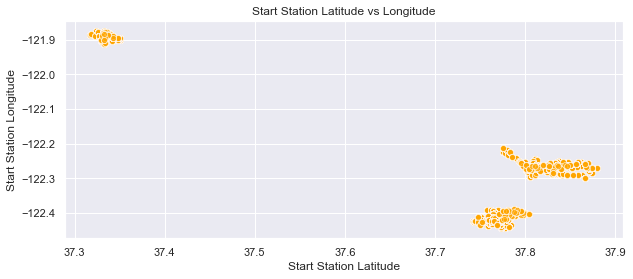

In [35]:
#scatterplots for two continuous data
plt.figure(figsize=(10,4))
ax=sns.scatterplot(x=log_lat.start_station_latitude,y=log_lat.start_station_longitude,color="orange",alpha=.7)
ax.set_xlabel("Start Station Latitude")
ax.set_ylabel("Start Station Longitude")
ax.set_title("Start Station Latitude vs Longitude")

###### Analysis:

So, It's time to visualization be two features at a time.
Now earlier we see longitude and latitue indivisually but while aggregating into one, our visualization becomes more clear about the Start Stations.

#### Feature Name: Start Station Longitude and Duration

Text(0.5, 0, 'Longitude')

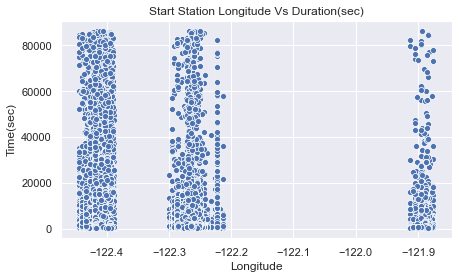

In [36]:
#scatterplots for two continuous data
plt.figure(figsize=(7,4))
ax=sns.scatterplot(x='start_station_longitude',y="duration_sec", data=df_trip_clean)
ax.set_title('Start Station Longitude Vs Duration(sec)')
ax.set_ylabel('Time(sec)')
ax.set_xlabel('Longitude')


###### Analysis:

Visualizing Trip Duration and Longitude gives an idea about the time taken in each region. The longitude -122.4 has quite dense
distribution of time(sec), it shows people from this area rents the bike for more time.

#### Feature Name: Start Day And Start Month

In [37]:
#new dataframe
new_month_day=df_trip_clean[['start_day','start_month','bike_id']]

In [38]:
#groupby
new_month_day=new_month_day.groupby(['start_day', 'start_month'])['bike_id'].size().to_frame(name = 'count').reset_index()

In [39]:
#to pivot table
new_month_day=new_month_day.pivot('start_day','start_month')

Text(111.5, 0.5, 'Start Date')

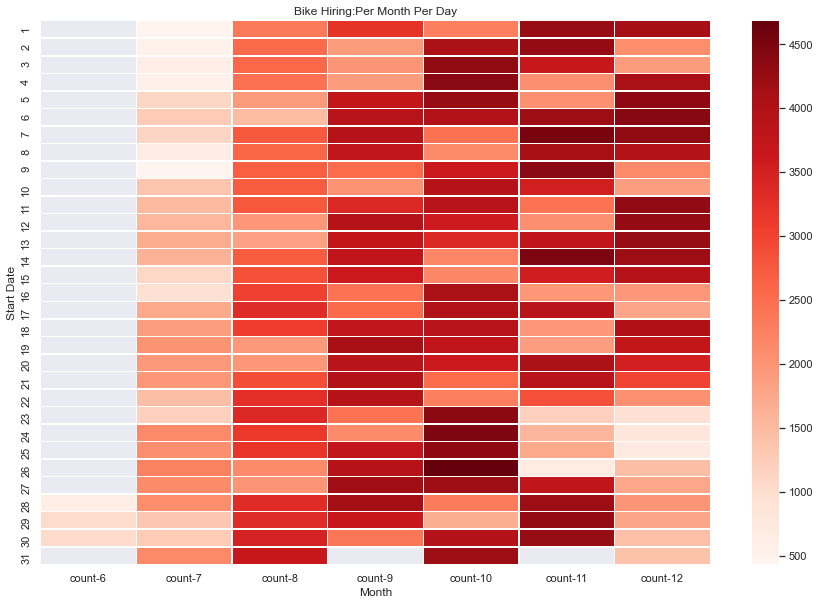

In [40]:
#heatmap for two discrete data
plt.figure(figsize=(15, 10));
ax=sns.heatmap(new_month_day,cmap="Reds",linewidths=.5)
ax.set_title('Bike Hiring:Per Month Per Day')
ax.set_xlabel('Month')
ax.set_ylabel('Start Date')

###### Analysis:

This gives the idea about the trend the way bikes are got hired. The heatmap shows the frequncy of hiring bike every day per month.
Darker the colour more is the frequncy. We can see that every month excluding June has a fix trend. There is continuous hiring for 5 days and then drop for 2 days.

### Quantitative Variables Vs Qualitative Variables

#### Feature Names: User_type and duration_sec

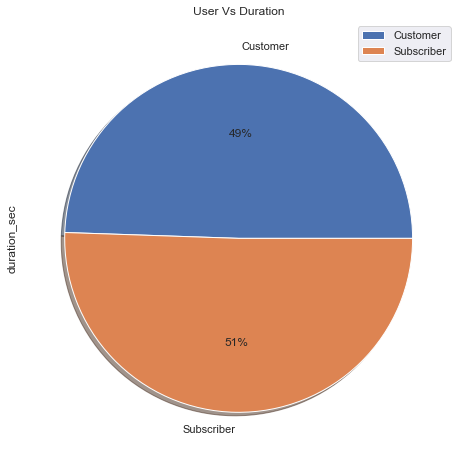

In [41]:
#pie chart for two categorical data
df_trip_clean.groupby('user_type')['duration_sec'].sum().plot(kind='pie',figsize=(8,8), shadow=True,autopct='%1.0f%%', legend=True,title='User Vs Duration')
plt.show()

###### Analysis:

This visualization is very interesting because as saw earlier that only 1/5th of customers are contributing in total hiring but here 
we can see that their contribution in hiring a bike with respect to time is almost equal to the Subscribers.


#### Feature Names: User Type and Start Month

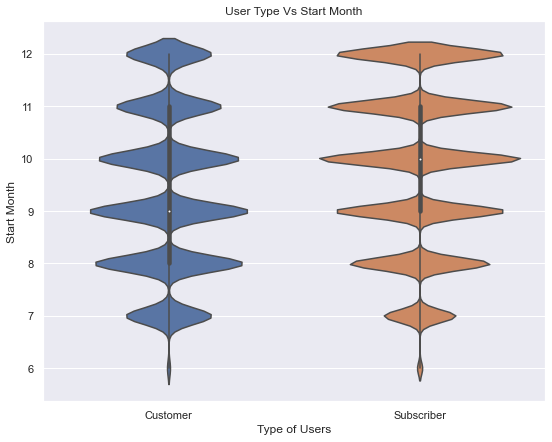

In [42]:
#violin plot for onre categorical and one numeric
fig, ax = plt.subplots(figsize =(9, 7)) 
ax=sns.violinplot(x='user_type',y='start_month',data=df_trip_clean)
ax.set_title('User Type Vs Start Month')
ax.set_ylabel('Start Month')
ax.set_xlabel('Type of Users')
plt.show()

###### Analysis:

Now will see the type of users are renting bike in the particular month.
Casual customers hire the bike moslty in the month of august to October while Subscribers hire the bike frequently from September to December.

#### Feature Names: User Type Vs Start Day

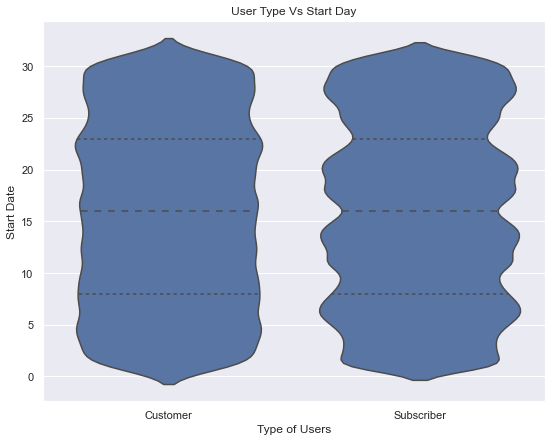

In [43]:
#violin plot for onre categorical and one numeric
fig, ax = plt.subplots(figsize =(9, 7)) 
ax=sns.violinplot(data=df_trip_clean, x='user_type', y='start_day', color=sns.color_palette()[0],inner='quartile')
ax.set_title('User Type Vs Start Day')
ax.set_ylabel('Start Date')
ax.set_xlabel('Type of Users')
plt.show()

###### Analysis:

There is a trend while hiring the bike with respect to Subscribers whereas Customers' hiring seems to be linear 

#### Feature Names:Start Month and Start Name(Station Name)

In [44]:
#copy to new dataframe
df=df_trip_clean[['start_month','start_name','bike_id']].copy()
#groupby
df=df.groupby(['start_month','start_name']).size().reset_index()

In [45]:
#to pivot table
df=df.pivot('start_month','start_name')

Text(93.5, 0.5, 'Month')

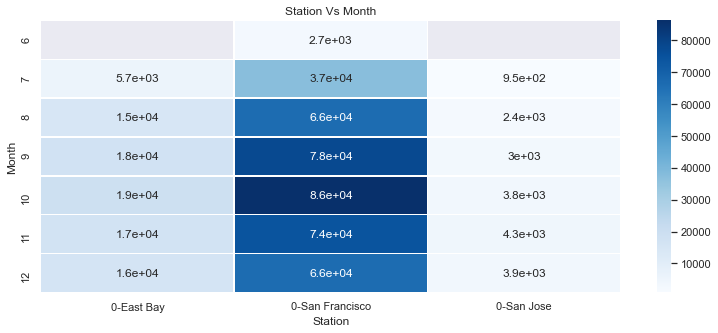

In [46]:
#heat map for one numeric and one categorical data
plt.figure(figsize=(13, 5));
ax=sns.heatmap(df,cmap="Blues",linewidths=.5,annot=True)
ax.set_title('Station Vs Month')
ax.set_xlabel('Station')
ax.set_ylabel('Month')

##### Analysis:

Main finding of this plot is that San Francisco has more registerd Customers and Subscribers which leads to the highest hiring of the bikes in
each month.
For San Francisco and East Bay October is the highest hiring month, and for San jose November adds more audience.

### Qualitative Variables Vs Qualitative Variables

#### Feature Names: User Type and Start Name(station name)

Text(0, 0.5, 'Count')

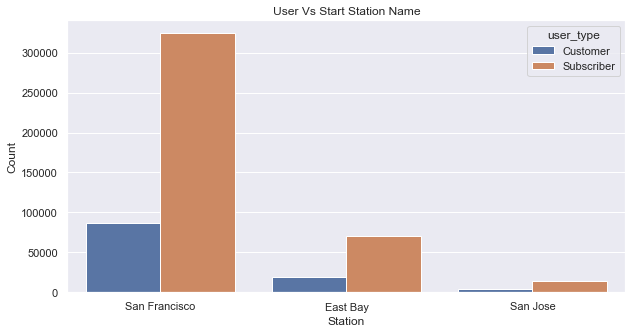

In [47]:
#countplot for two categorical data
fig, ax = plt.subplots(figsize =(10, 5)) 
ax=sns.countplot(x="start_name",hue='user_type',data=df_trip_clean)
ax.set_title('User Vs Start Station Name')
ax.set_xlabel('Station')
ax.set_ylabel('Count')

###### Analysis:

Categorizing Users on the basis of Regions. San Francisco has most users , followed by East Bay and then San Jose.
Now User type has same trend as total user counts.

### Multivariate Visualization

#### Feature Names: Start Latitude , Start Longitude and Start Station Name

Text(0.5, 0, 'Latitude')

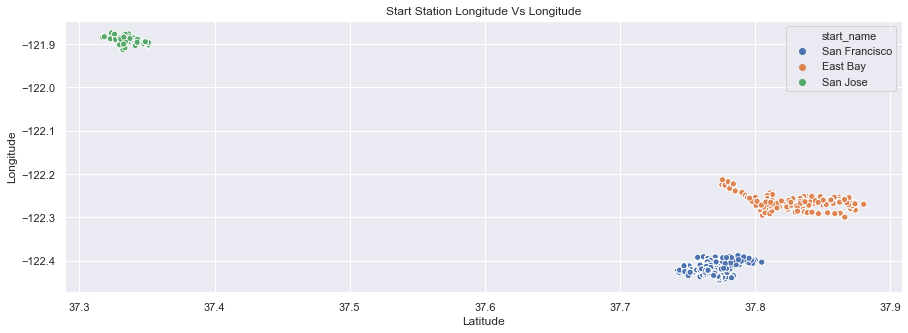

In [48]:
#scatter plot for multivariate visualization of two numeric and one categorical
plt.figure(figsize=(15,5))
ax=sns.scatterplot(x='start_station_latitude',y="start_station_longitude", data=df_trip_clean,hue='start_name')
ax.set_title('Start Station Longitude Vs Longitude')
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')

##### Analysis:

As i mentioned while visualizing univariate that the multivariate plot will give better regionwise classification of start stations.
and here we can easily differentiate after adding third feature  as the regions.

#### Feature Names: Start Longitude, Start Latitude and User Type

Text(0.5, 0, 'Latitude')

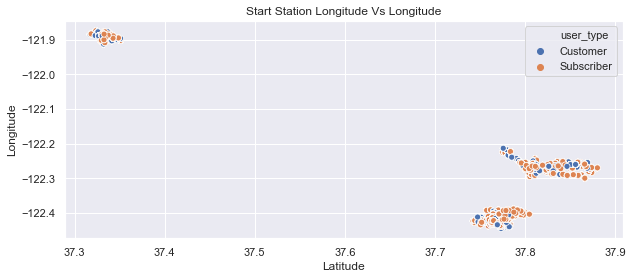

In [49]:
#scatter plot for multivariate visualization of two numeric and one categorical
plt.figure(figsize=(10,4))
ax=sns.scatterplot(x='start_station_latitude',y="start_station_longitude", data=df_trip_clean,hue='user_type')
ax.set_title('Start Station Longitude Vs Longitude')
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')

###### Analysis:

Sometimes Bivariate visualization gives better analysis than multivariate. The previous Plot(User Vs Station name) gives better idea 
of the distribution of the users regionwise.

#### Feature Names: Start Station LOngitude  Duration and Customers

Text(0.5, 0, 'Longitude')

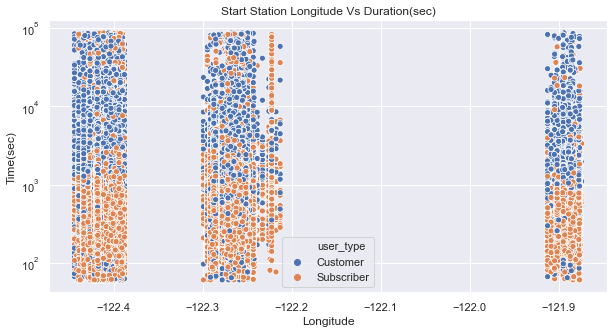

In [50]:
#scatter plot for two numeric and one categorical
plt.figure(figsize=(10,5))
ax=sns.scatterplot(x='start_station_longitude',y="duration_sec", data=df_trip_clean,hue='user_type')
plt.yscale('log')
ax.set_title('Start Station Longitude Vs Duration(sec)')
ax.set_ylabel('Time(sec)')
ax.set_xlabel('Longitude')

###### Analysis:

It's a great Visualization that gives the idea in which region a particular type of user has more trip time.
we can see that customers hire bikes for more time as compared to subscirbers and that is why being in less count Customers adds more time trip and hence benefits the company.

#### Feature Name:Start Month Start day And User type

Text(0.5, 0, 'Month')

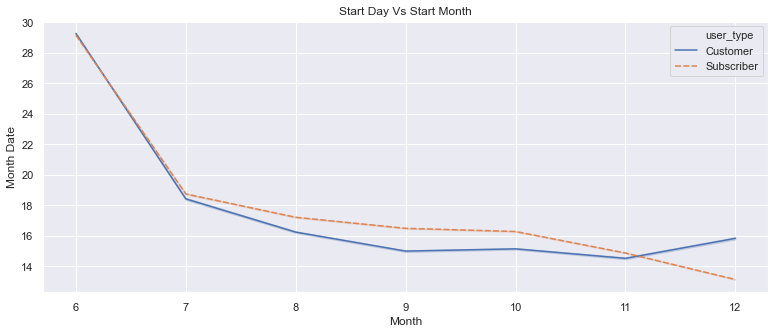

In [51]:
#visulaize three features using lineplot
plt.figure(figsize=(13,5))
ax = sns.lineplot(x="start_month", y='start_day', hue="user_type",
                  style="user_type", ci=68, data=df_trip_clean)

ax.set_title('Start Day Vs Start Month')
ax.set_ylabel('Month Date')
ax.set_xlabel('Month')

###### Analysis:

The line plot shows how users are hiring bikes per day per month.

#### Feature Name:Start Month Start day And Start Station

Text(0.5, 0, 'Month')

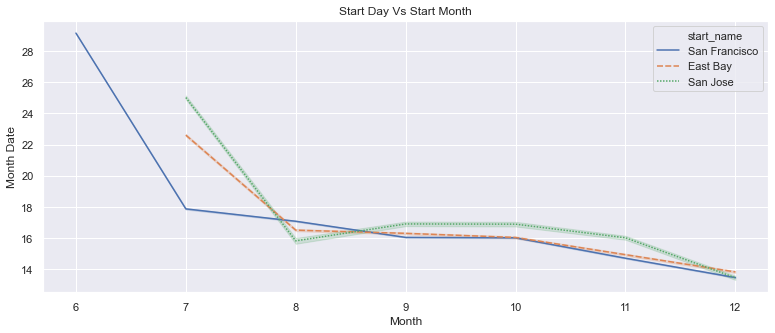

In [52]:
#visulaize three features using lineplot
plt.figure(figsize=(13,5))
ax = sns.lineplot(x="start_month", y='start_day', hue="start_name",
                  style="start_name", ci=68, data=df_trip_clean)
ax.set_title('Start Day Vs Start Month')
ax.set_ylabel('Month Date')
ax.set_xlabel('Month')

###### Analysis:

The line plot shows how users are hiring bikes per day per month in the particular region.


# References:
    

https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column#:~:text=7%20Answers&text=Pandas%20DataFrame%20columns%20are%20Pandas,it%20with%20list(x)%20.

https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot

https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html 

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe

https://stackoverflow.com/questions/18695605/python-pandas-dataframe-to-dictionary

https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column

## 4.Conclusion

This is not the end though, I would polish some visualizations for the better story telling in the next notebook.
I will follow a proper way of story telling so that anybody can get attached to it and understands in better way.